# A first look at artificial neural networks

## Artificial Neural Networks

Artificial Neural Networks (ANNs) are computational processing systems that are heavily inspired by the way biological nervous systems function. The basic structure of an ANN can be visually conceptualised like:

<a title="Glosser.ca, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Colored_neural_network.svg"><img width="256" alt="Colored neural network" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/256px-Colored_neural_network.svg.png"></a>

**Figure 1:** A simple three layered fully connected feedforward neural network (FNN), aka Multi-layer perceptrons (MLPs),comprisedof a input layer, a hidden layer and an output layer.




### Neural network modelling frameworks

##### Tensorflow and Keras 
Keras is a powerful and easy-to-use Python library for developing and evaluating deep learning models. It provides a highlevel neural networks API for running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

In this worksheet, you will learn how to create a neural network using Keras and with the underlying low level deep learning framework of Tensorflow. 

Neural network models are trained by gradient descent. As we perform computations, Tensorflow memorises the computation graph that we build up. When it comes to compute the gradient, tensorflow can trace back over the computation graph (using the backpropagation algorithm) and work out all the required gradients. When we build models with Keras, we don't usually have to worry about low level computation just like with Scikit-learn.

### Tensorflow 1.x vs. Tensorflow 2
Compared with Tensorflow 1.x, Tensorflow 2 (introduced in 2019) starts to promote the use of two APIs: Keras for model building/training and Estimators for scaled serving. 
In Tensorflow 2, eager execution is implemnted by default, i.e. you don't need to create a session in order to run the computational graph (i.e. much easier to debug without sacrifysing flexibility and performance). 

To switch to Tensorflow 2 should be straghtforward if Keras is used, simply import Keras in possibly a different way. 
e.g. import tf.keras as Keras (in Tensorflow 2, or Tensorflow 1.10 or above)

Colab has got Tensorflow installed already. In case you use Anaconda or miniconda and haven't got installed Tensorflow yet, you can do it following the instruction here:
https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/

If you are not sure if you have got a suitable GPU, you can start with installing Tensorflow for CPU only.

If you have trouble installing Tensorflow in your computer, or your computer does not have sufficient computational power, it would be easier to switch to Colab, or Kaggle kernel, or use some virtual machine in the cloud, where better computational resources (for RAM, CPU, GPU) are available. 

To get started, import tf.keras or keras as part of your TensorFlow program setup:

In [1]:
# Import tensorflow, check version
import tensorflow as tf
import tensorflow.keras as keras # or import keras 
tf.__version__

'2.4.1'

### Tensor
In general, all current machine-learning systems use tensors as their basic data structure — usually for numerical data. 

Tensors are a generalization of matrices to an arbitrary number of dimensions (note that a dimension is often called an axis in a tensor). NumPy arrays can be called tensors.

* Scalar (rank-0 tensor).
* Vectors (rank-1 tensor).
* Matrices: rank-2 tensors.
* Rank-3 tensors and higher-rank tensors (e.g. array x below are Rank-3 tensors)

In [2]:
import numpy as np
x = np.array([[[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]]])
print(x.ndim)
print(x.shape)

3
(3, 3, 5)


## MNIST

 The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. The MNIST data-set is about 12 MB and will be downloaded automatically if it is not located in the given path.

In [3]:
from keras.datasets import mnist

(image_train, label_train), (image_test, label_test) = mnist.load_data()

print("Size of:")
print("- Training-set:\t\t{}".format(image_train.shape))
print("- Test-set:\t\t{}".format(image_test.shape))

11493376/11490434 [==============================] - 3s 0us/step
Size of:
- Training-set:		(60000, 28, 28)
- Test-set:		(10000, 28, 28)


In [7]:
# Your code: 
# print label_train, print its shape
print(label_train.shape)
print(label_train)

(60000,)
[5 0 4 ... 5 6 8]


The data-set is split into 3 mutually exclusive sub-sets. We will only use the training and test-sets in this tutorial.

Define a simple function to have a look at the images.

## Getting to know our data

The following method is plots 9 images from the dataset in a 3x3 grid.

In [8]:
import matplotlib.pyplot as plt

def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        #ax.imshow(images[i].reshape(img_shape), cmap='binary')
        ax.imshow(images[i], cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

Plot a few images to see if data is correct

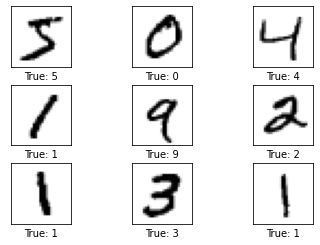

In [9]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length. (might want to use this later for input_size...)
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10

# Get the first images from the test-set.
images = image_train[0:9]

# Get the true classes for those images.
cls_true = label_train[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

For this first network, we'll flatten everything into a 784-dimensional feature vector.

In [11]:
# In general, you may select between any two indices along each tensor axis. 
# For instance, in order to select 14 × 14 pixels in the bottom-right corner for image with index 10, you do this:
my_slice = image_train[10, 14:, 14:]
print(my_slice.shape)
my_slice

(14, 14)


array([[254, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [ 89,  93, 240, 254, 171,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   1, 128, 254, 219,  31,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   7, 254, 254, 214,  28,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0, 138, 254, 254, 116,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [ 25, 240, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [206, 254, 254, 139,   8,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [254, 253, 213,  11,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [254, 236,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [239,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0, 

The images we get were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

In [12]:
# Prepare data, flatten the input and rescale
X_train = image_train.reshape((60000, 28*28)) # or #X_train = image_train.reshape(X_train.shape[0], -1)
X_train = X_train.astype('float32')/255 
X_test = image_test.reshape((10000, 28*28)) # or #X_test = image_test.reshape(X_test.shape[0], -1)
X_test = X_test.astype('float32')/255

print("Size of:")
print("- Training-set:\t\t{}".format(X_train.shape))
print("- Test-set:\t\t{}".format(X_test.shape))

Size of:
- Training-set:		(60000, 784)
- Test-set:		(10000, 784)


#### To build a fully connected feedforward network (aka Multilayer Perceptron (MLP))
The first model we'll use is a simple fully connected feedforward network. This is called a Dense layer in Keras. -
#### Dimensionality reduction with PCA
Since fully connected layers are a bit heavy on image data (and you're probably running this on your laptop), we'll reduce the dimensionality of the data by [PCA (principal component analysis)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). PCA decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. We will discuss topic on dimensionalilty reduction in a few weeks. 

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=60) # reduce to 60 dimensions
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

print(X_train.shape) 
print(X_test.shape) # NB: none of this is Keras yet. We're just using sklearn on some numpy arrays

(60000, 60)
(10000, 60)


The training labels are encoded as integers. We need these as one-hot vectors instead, so we can match them to the ten outputs of the neural network.

In [14]:
from keras.utils import to_categorical

print(label_train.shape, label_test.shape)

y_train = to_categorical(label_train)
y_test = to_categorical(label_test)

print(y_train.shape, y_test.shape)

(60000,) (10000,)
(60000, 10) (10000, 10)


### Question: 
Look at the one-hot coding given by y_train[0], which digit does it represent?

In [20]:
print(y_train[0]) # print the one-hot vector for the first example

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


We are now ready to create a model. 

## Keras Model

The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the ```Sequential``` model, a linear stack of **layers**. Before we start take some time to read the ```Sequential``` documentation:

https://keras.io/getting-started/sequential-model-guide/

Note: Keras has two APIs for this: the **Sequential** API and the **Model** API. The sequential API (the simplest) assumes that your model is a simple sequence of operations, usually neural network layers. The input is passed through the first layer, the result of that is passed through the second and so on. 

This is useful for simple NN models where you are only interested in the input and output. If your model gets more complex, you may want to use the Model API (we'll use in the next practicals).

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam

model = Sequential()
model.add(Dense(32, input_shape=(60,))) # first dense layer,32 hidden units 
model.add(Activation('relu'))            # activation layer
model.add(Dense(10))                     # second dense layer
model.add(Activation('softmax'))         # output class probabilities

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                1952      
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 2,282
Trainable params: 2,282
Non-trainable params: 0
_________________________________________________________________


In [26]:
optimizer = SGD(lr=0.001) # lr is the learning rate
#optimizer = Adam(lr=0.001) # 
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

We've also told the compiler that we'd like it to compute accuracy for us during training (since categorical cross-entropy is a bit hard to interpret).

We're now ready to start training:

In [34]:
# Train the model, iterating on the data in batches of 32 samples
model.fit(X_train, y_train, epochs=5, batch_size=1000);

Epoch 1/5
60/60 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.8786
Epoch 2/5
60/60 [==============================] - 0s 2ms/step - loss: 0.4224 - accuracy: 0.8799
Epoch 3/5
60/60 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8810
Epoch 4/5
60/60 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8824
Epoch 5/5
60/60 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8834


In [ ]:
# evaluate the keras model 
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 0s 943us/step - loss: 0.8063 - accuracy: 0.9092
Accuracy: 90.92


In [41]:
# Or better to making predictions and get the confusion matrix
# model.predict will generate probability for all 10 digits, 
#    so we use argmax to pick the class with the highest probability
from sklearn import metrics
y_pred = model.predict(X_test)
print(y_pred[0]) # print the prediction for first image

print('\nConfusion matrix: ')
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)

print('\nClassification report: ')
print(metrics. classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

[2.3422082e-04 2.1926875e-05 1.1312426e-04 8.0677168e-04 5.6013309e-06
 2.8109044e-04 5.7413610e-07 9.9572146e-01 4.2973628e-05 2.7722742e-03]

Confusion matrix: 
[[ 930    0    4    6    0   26   10    1    3    0]
 [   0 1091    3    5    0    4    6    1   25    0]
 [  12   12  886   20   15    5   17   17   42    6]
 [   3    4   20  902    1   21    3   26   27    3]
 [   0   11    5    1  877    1   16    1    6   64]
 [  14    7    7   37   15  742   19   14   26   11]
 [  22    4    6    1   10   22  888    1    4    0]
 [   5   20   36    4   10    0    1  909    5   38]
 [  11   19   16   20   16   40   11   18  799   24]
 [   9    9    9    9   59   18    2   32   11  851]]

Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       980
           1       0.93      0.96      0.94      1135
           2       0.89      0.86      0.88      1032
           3       0.90      0.89      0.90      1010
          

### Tasks

As you now have a model to play with (in no particular order):

1. Change the `learning-rate` for the optimiser.
2. Change the ```batch_size``` to e.g. 1 or 1000 (and see how learning rate deals with larger/smaller batch sizes).
3. Change the optimiser: from SGD to Adam
4. Add complexity to the model, being mindful of how "powerful" your computers are.

7. Try and find a sweet-spot between the size and performance of the model, take into account things like the number of iterations/epochs required to train the model in these assumptions.

6. Do you get the exact same results if you run the Notebook multiple times without changing any parameters? Why or why not?

5. Do you think these changes will have the same effect (if any) on other classifiers?

8. Investigate **effect of dimensionality reduction** (with PCA, e.g. you may try to build the model without PCA and compare ...)

9. Try out some **other ML classifiers** that have been discussed in the class, e.g. kNN (with scikit-learn) 

In [ ]:
# Your code
#
#

